# Group 18: Anaconda Don't #

## Kirsten Landsiedel, Natasha Vuong, Stephen Chen, Un Young Chung ##

## Written Report ##

### <span style="color:darkblue">Background Information</span> ###

The World Happiness Report is an annual survey of global happiness that has been conducted every year since 2005. That data provides insight into variables aimed at measuring social norms, conflicts, government policies, and welfare in over 130 countries around the world surveyed. The World Happiness Report aggregates data from the Gallup World Poll, The World Bank, and The World Health Organization. The Gallup Poll samples 1,000 people from each of the countries each year and asks them a series of questions in order to provide insights into key indicators such as law and order, food/shelter, working conditions, economics, health, well-being, education, and political freedom in order to demonstrate “their correlations with world development indicators such as GDP.”
    
People are selected to answer Gallup World Poll questions through the use of assisted random-digit-dial (RDD) telephone samples using a proportionate, stratified sampling design. In cases where this is impossible to achieve due to a lack of infrastructure or accessibility, random homes are selected for in-person interviews using similar techniques. The World Gallup Poll claims that it represents 95% of the world’s adult population.

The World Happiness Report began to release data surrounding the topic of happiness in 2012, in support of the United Nation’s high level meeting on “Wellbeing and Happiness: Defining a New Economic Paradigm”. The United Nations was looking to delve deeper into the science of happiness, and the World Happiness Report provided data that lead to the discovery of reliable correlations (as causation cannot be claimed due to limitations of the data) between people’s quality of life and a variety of subjective measures of well-being. The three relationships that are currently being explored by The World Happiness Report and its data analytics are:

1. The link between government and happiness.
2. The power of prosocial behavior.
3. Changes in information technology.

Although The World Happiness Report has provided great insights into many of the different facets of this data set, our work aimed to expand upon this groundwork and continue to ask new questions and explore new relationships among the data.

### <span style="color:darkblue">Description of Data</span> ###

The variables used in our data set are measured and standardized according to the following set of explanations and guidelines. Additional explanations are provided for more technical economic indicators.

Many of these explanations come from/are adapted from the index that describes the World Happiness data; most have been modified.

- __Year__: The year in which the data was collected.


- __Life Ladder__: This is the happiness measurement. The question asked is: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”


- __Log GDP per capita__: Measured in Purchasing Power Parity (PPP) at constant 2011 international dollar prices from the November 14, 2018 update of the World Development Indicators (WDI). This basically is a method of standardizing currencies such that comparison between countries is possible. After standardization, the natural logarithm is taken to make the values smaller.
    + _Further explanation: GDP is a financial wellness indicator that essentially measures the productive capacity of a country’s economy. Although there are many reliable ways to calculate GDP, one popular method is the “expenditure approach” which sums up all final goods and services produced in an economy in a given year (or other period of time). A common formula for this calculation is GDP = C (consumption) + I (investment) + G (government spending) + NX (net exports). Although the formula is simple, the actual accounting is far from it._
    + _Wikipedia:_ Purchasing power parity is a theory that measures prices at different locations using a common good or goods to contrast the real purchasing power between different currencies
    
    
- __Social Support__: This variables provides a binary response to the question: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”. All 1,000 responses are then averaged and the country’s score for Social Support is thus calculated.


- __Healthy Life Expectancy (HLE)__: Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. It represents the number of years of good/full health a newborn baby can expect, not hampered by disabilities, disabling illnesses, or injuries.


- __Freedom to make life choices__: Binary response to: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”. All 1,000 responses are then averaged and the country’s score for Freedom to make life choices is thus calculated.


- __Generosity__: The residual of regressing national average of binary response to the question “Have you donated money to a charity in the past month?” on GDP per capita. This means that the measurement of generosity factors out the part of the variation in generosity that is explained by GDP per capita. The residual is then the part of the variation in generosity that is NOT due to GDP per capita ie it is making the comparisons of generosity in terms of financial means to give (ie those in Sub-Saharan Africa are not punished for not donating charity as much as those in Sweden). This allows us to view generosity in terms of people’s financial means.


- __Perception of corruption__: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”. The overall perception score is just the average of the two 0-or-1 responses.


- __Positive Affect__: These measures are the responses to the following three questions, respectively: “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Happiness?”, “Did you smile or laugh A LOT OF THE DAY yesterday?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”. Averages are taken from these binary responses.


- __Negative Affect__: The average of three negative affect measures in GWP. Average of binary responses to “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”, “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”


- __Confidence in National Government__: Confidence in National Government: Binary response to: “Do you have confidence in your national government?”. All 1,000 responses are then averaged and the country’s score for Confidence in National Government is thus calculated.


- __Democratic Quality__ and __Delivery Quality__: Democratic and delivery quality measures of governance are based on the Worldwide Governance Indicators (WGI) project (Kaufmann, Kraay and Mastruzzi) updated on 29-Sep-2017, covering the years up to 2016. The original data have six dimensions: Voice and Accountability, Political Stability and Absence of Violence, Government Effectiveness, Regulatory Quality, Rule of Law, and Control of Corruption. The indicators are on a scale roughly with mean of zero and a standard deviation of 1. We reduce the number of dimensions to two using the simple average of the first two measures as an indicator of democratic quality, and the simple average of the other four measures as an indicator of delivery quality, following Helliwell and Huang (2008).


- __Region__: We added this variable from a separate data file. It classifies each country into its region of the world.

## Exploratory Data Analysis ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/Rebecca/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### <span style="color:darkblue">Data Cleaning</span> ###

In [5]:
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv'
happy = pd.read_csv(url)

col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
happy_clean = happy.iloc[:,col_range] # drop variables with lots of missing data
happy_clean.iloc[:,1:] = happy_clean.iloc[:,1:].apply(pd.to_numeric)
happy_fin = happy_clean.set_index('Country name')

happy_2017 = happy_fin.loc[happy_fin.Year == 2017,:]
happy_2017_clean = pd.read_csv('https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_clean.csv')
happy_2017_final = pd.read_csv('https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv', index_col = 0)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Because the majority of our data analysis was on the data from countries in 2017, we cleaned data from 2017. A simple line of code yielded 19 countries that had missing data. From there, we determined how to handle the missing data on case-by-case basis.

In [6]:
happy_2017[happy_2017.isnull().any(axis = 1)]

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,NaN,-0.927691,-0.816839
Bahrain,2017,6.227321,10.675694,0.875747,68.500000,0.905859,0.128193,NaN,0.813571,0.289760,NaN,-1.167434,0.226644
China,2017,5.099061,9.636177,0.772033,69.000000,0.877618,-0.191225,NaN,0.821097,0.214005,NaN,-0.877810,-0.064555
Egypt,2017,3.929344,9.263901,0.638226,61.400002,0.592505,-0.159880,NaN,0.539323,0.414494,NaN,-1.332293,-0.639170
Iran,2017,4.716783,9.856533,0.714233,65.699997,0.730635,0.186622,0.714941,0.693666,0.438534,NaN,-1.114465,-0.720983
Jordan,2017,4.808083,9.028518,0.814665,66.599998,0.766262,-0.150126,NaN,0.627798,0.391505,NaN,-0.625527,0.183539
Kuwait,2017,6.093905,11.090272,0.853491,66.500000,0.884182,-0.039014,NaN,0.692072,0.307321,NaN,-0.323727,-0.114578
Libya,2017,5.646852,9.791522,0.822759,62.299999,0.778696,-0.053039,0.673066,0.697049,0.379374,NaN,-1.884453,-1.840400
Morocco,2017,5.312483,8.920658,0.641193,65.599998,0.814258,-0.227034,0.840502,0.559288,0.322716,NaN,-0.530936,-0.173838


Some missing data, like ones in "Log GDP per capita", could be searched up on the internet, although sometimes difficult, and we filled in the missing data. Other variables, like ones in "Healthy life expectancy", could not be easily searched up on the internet. For these missing data, we decided to remove the country's observation altogether, as we were unable to accurately fill them in. We ended up dropping 5 observations (Palestininan Territories, Taiwan Province of China, South Sudan, Vietnam, Yemen).

In [7]:
# drop the 5 countries
happy_2017 = happy_2017.drop(['Palestinian Territories','Taiwan Province of China', 'South Sudan', 'Vietnam', 'Yemen'])

Of the 19 countries, we could see that a large portion of them had both "Perceptions of corruption" and/or "Confidence in national government" data missing, which could be an interesting indicator of how citizens felt about their country's politics. We decided to fill in this missing information, so we used two separate OLS models, one to predict "Perceptions of corruption" and "Confidence in national government." To build the model, we only used available data (no missing data values) from 2017 and plotted all quantitative variables against "Confidence in national government" (and then doing the same against "Perceptions of corruption"), and if plots showed any linear relationship, we picked those variables to build the model. We found that the combination "Freedom to make life choices" and "Generosity" variables had a statistically significant relationship with "Confidence in national government" (p-values of coefficients were less than the accepted 0.05) and used this model to predict missing "Confidence in national government" data in 2017. We also found that the combination of "Generosity", "Democratic Quality", and "Delievery Quality" had a statistically significant relationship with "Perceptions of corruption" and used this model to predict missing "Perceptions of corruption" data in 2017.

In [8]:
# model to predict missing "Confidence in national governmnent" data in 2017
df = happy_2017.dropna()
model = smf.ols('Q("Confidence in national government") ~ Q("Freedom to make life choices") + Q("Generosity")', data = df)
results = model.fit()
print(results.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Q("Confidence in national government")   R-squared:                       0.273
Model:                                                OLS   Adj. R-squared:                  0.262
Method:                                     Least Squares   F-statistic:                     23.69
Date:                                    Thu, 05 Dec 2019   Prob (F-statistic):           1.84e-09
Time:                                            08:47:36   Log-Likelihood:                 41.936
No. Observations:                                     129   AIC:                            -77.87
Df Residuals:                                         126   BIC:                            -69.29
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

In [9]:
# predicting missing "Confidence in national government" scores and placing it to the dataframe
confidence = happy_2017[happy_2017['Confidence in national government'].isna()]
for country in confidence.index:
    df = happy_2017[happy_2017.index == country]
    happy_2017.loc[country,'Confidence in national government'] = results.predict(df)[country]

In [10]:
# model to predict missing "Perceptions of corruption" data in 2017
df = happy_2017.dropna()
model2 = smf.ols('Q("Perceptions of corruption") ~ Q("Generosity") + Q("Democratic Quality") + Q("Delivery Quality")', data = df)
results2 = model2.fit()
print(results2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Q("Perceptions of corruption")   R-squared:                       0.477
Model:                                        OLS   Adj. R-squared:                  0.465
Method:                             Least Squares   F-statistic:                     39.27
Date:                            Thu, 05 Dec 2019   Prob (F-statistic):           4.26e-18
Time:                                    08:47:37   Log-Likelihood:                 78.559
No. Observations:                             133   AIC:                            -149.1
Df Residuals:                                 129   BIC:                            -137.6
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975

In [11]:
# predicting missing "Perceptions of corruption" scores and placing it to the dataframe
perception = happy_2017[happy_2017['Perceptions of corruption'].isna()]['Perceptions of corruption']
for country in perception.index:
    df = happy_2017[happy_2017.index == country]
    happy_2017.loc[country,'Perceptions of corruption'] = results2.predict(df)[country]

From here, we inputted the predicted missing data back into the appropriate cells and dropped appropriate observations. While cleaning the data, we noticed variables that we did not have sufficient explanations of what they were (Standard deviation/mean of ladder by country-year and gini of household income) and removed the columns. Lastly, we added a new column to the dataset, Region, denoting which region the country was geographically located. We added this region from a different dataset that had this information, and merged that dataframe with our clean dataframe. Some countries did not have a region, and we filled in this information by searching on the internet where the countries were located.

In [12]:
# we see that there is no missing data anymore
happy_2017[happy_2017.isnull().any(axis = 1)]

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,


##### <span style="color:darkblue">Combining Regions to Data</span> #####

In [13]:
happy = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")
col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
happy = happy.iloc[:,col_range] # drop variables with lots of missing data

country = pd.read_csv("/Users/Rebecca/Documents/Stats131/Final Project/countries.csv")

FileNotFoundError: [Errno 2] File b'/Users/Rebecca/Documents/Stats131/Final Project/countries.csv' does not exist: b'/Users/Rebecca/Documents/Stats131/Final Project/countries.csv'

In [14]:
country_name = happy['Country name'].unique()
country_name = pd.DataFrame(country_name)
country_name.columns = ['Country']
country = country[['Country','Region']]

TypeError: string indices must be integers

In [15]:
country_name['Country'] = country_name['Country'].astype(str)
country['Country'] = country['Country'].astype(str)
country_name['Country'] = country_name['Country'].str.strip()
country['Country'] = country['Country'].str.strip()

inner = pd.merge(left=country_name, right=country, left_on="Country", right_on = "Country", how='left')
inner

happy_final = pd.merge(left=happy, right=inner, left_on='Country name', right_on = 'Country', how='left')
happy_final = happy_final.set_index('Country name')
happy_final.head()
#happy_final.to_csv("/Users/Rebecca/Downloads/happy_region.csv")

TypeError: string indices must be integers

### <span style="color:darkblue">Summary Statistics & Distributions</span> ###

##### <span style="color:darkblue">Exploratory Analysis: Regions</span> #####

__The plot below shows the relationship between "life ladder" scores and "social support" scores color-coordinated by regions.__

In [16]:
happy_2017_final = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv")

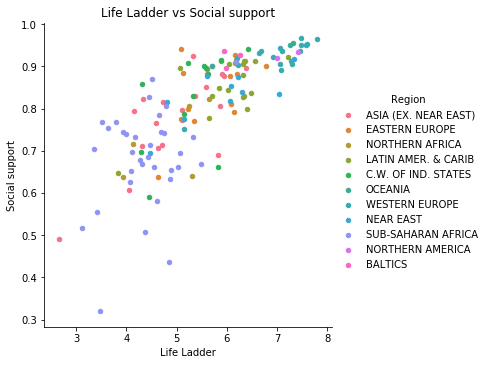

In [17]:
sns.lmplot(x='Life Ladder',y='Social support', hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Social support')
plt.show()

Holistically, the plot shows a positive, linear relationship with these two scores, meaning that happier countries tend to also have their citizens being able to help one another in times of need. Countries in Sub-Saharan Africa are clearly in bottom left of the graph, indicating low "life ladder" and "social support" scores. It is also clear that countries in regions Near East and Western Europe have the highest "life ladder and "social support" scores.

__The plot below shows the relationship between "life ladder" scores and "Healthy life expectnacy at birth" scores color-coordinated by regions.__

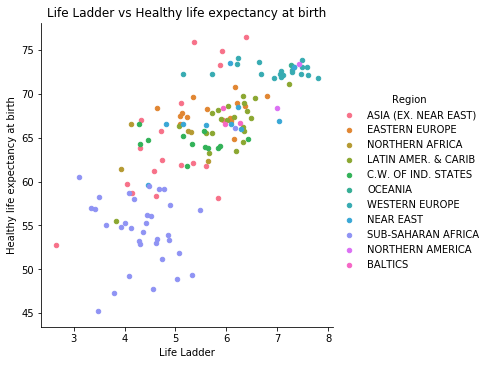

In [18]:
sns.lmplot(x='Life Ladder',y='Healthy life expectancy at birth',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Healthy life expectancy at birth')
plt.show()

Holistically, the plot shows a positive relationship between the two variables, meaning that happier countries tend to also have people with higher healthy life expectancy at birth. Countries in Sub-Saharan Africa are clearly in bottom left of the graph, also indicating that people in these countries experience the lowest healthy life expectancy when born. It is also clear that countries in regions Near East and Western Europe also have the highest healthy life expectacny at birth, as well.

__The plot below shows the relationship between "life ladder" scores and "Log GDP per capita" scores color-coordinated by regions.__

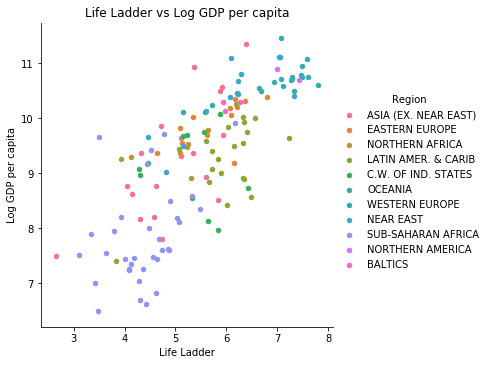

In [19]:
sns.lmplot(x='Life Ladder',y='Log GDP per capita',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Log GDP per capita')
plt.show()

Holistically, the plot shows a positive, although weak perhaps, relationship between the two variables. Countries in Sub-Saharan Africa are once again clearly in bottom left of the graph, indicating that these countries have the weakest productive capacity and lowest wealth compared to other countries. Countries in Western Europe and Near East also have the highest productive capacity and wealth. Interestingly, countries in Asia, excluding the Near East region, show a wide range in happiness scores and Log GDP per capita.

__The plot below shows the relationship between "life ladder" scores and "freedom to make life choices" scores color-coordinated by regions.__

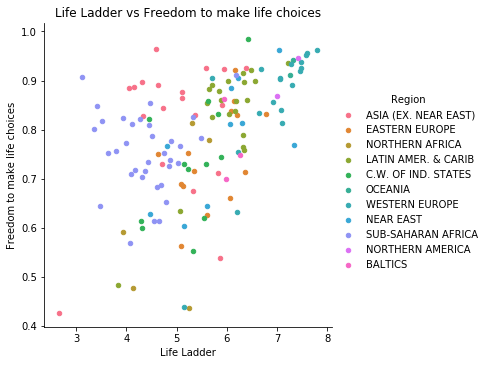

In [20]:
sns.lmplot(x='Life Ladder',y='Freedom to make life choices',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Freedom to make life choices')
plt.show()

Holistically, the plot shows that their is a weak, but positive, relationship between the two variables, meaning that people in happier countries may generally be very satisfied with their freedom to make their own choices. Countries in Sub-Saharan Africa are again in the bottom left of the graph, indicating that people in these countries are the least satisfied with their freedom to make decisions in their life. Countries in Western Europe and Near East also have show the highest scores in this area.

__The plot below shows the relationship between "perceptions of corruption" scores and "confidence in national government" scores color-coordinated by regions.__

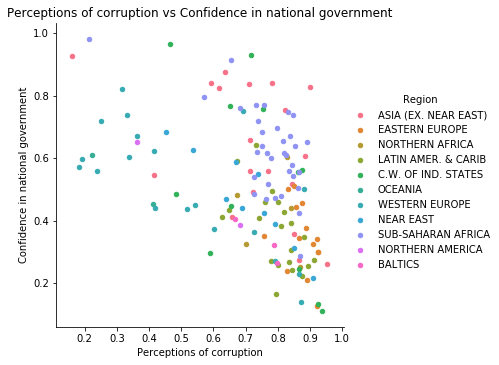

In [21]:
sns.lmplot(x='Perceptions of corruption',y='Confidence in national government',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Perceptions of corruption vs Confidence in national government')
plt.show()

The plot shows a negative relationship, with a "fan-ing in" behavior, between the two variables. This should come as no surprise, as it makes sense that people who perceive corruption throughout their government would have lower confidence in them. Interestingly, there are few countries that have low scores in "perceptions of corruption" and high scores "confidence in national government". Here, we can see that Latin American and Eastern European countries show high scores in "perceptions of corruption" and low scores in "confidence in national government. It is also interestingly to notice that most Sub-Saharan African countries have high scores in "perceptions of corruption" but vary relatively widely in "confidence in national government" scores.

##### <span style="color:darkblue">Relationships Between Life Ladder and other variables</span> #####

In [22]:
stephen = pd.read_csv('https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv', index_col=0)

stephen.rename(columns={'Country name':'country_name','Life Ladder':'Ladder','Log GDP per capita':'log_gdp_per_cap','Social support':'Social_Support','Healthy life expectancy at birth':'life_exp','Freedom to make life choices':'freedom_make_life_choices','Perceptions of corruption':'perceived_corruption','Positive affect':'pos_aff','Negative affect':'neg_aff','Confidence in national government':'conf_in_gov','gini of household income reported in Gallup, by wp5-year':'gini_household_inc','Democratic Quality':'dem_qual'},inplace=True)

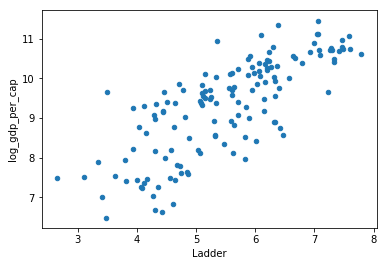

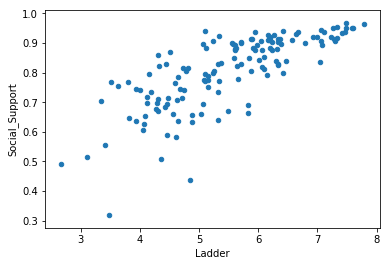

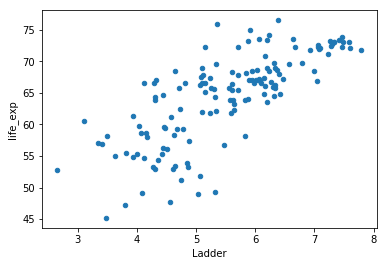

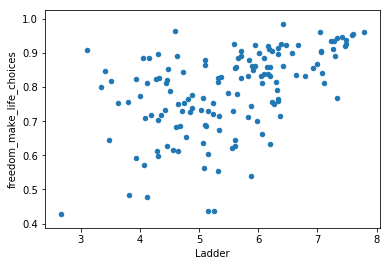

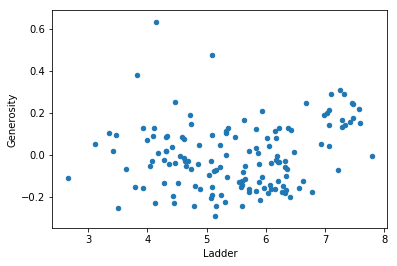

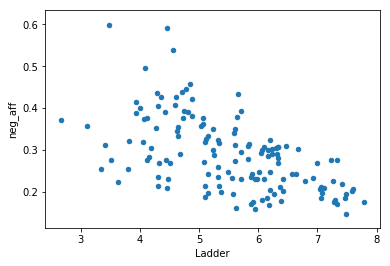

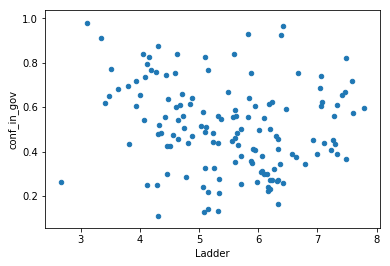

In [23]:
stephen.plot(x='Ladder',y='log_gdp_per_cap',kind='scatter')
stephen.plot(x='Ladder',y='Social_Support',kind='scatter')
stephen.plot(x='Ladder',y='life_exp',kind='scatter')
stephen.plot(x='Ladder',y='freedom_make_life_choices',kind='scatter')
stephen.plot(x='Ladder',y='Generosity',kind='scatter')
stephen.plot(x='Ladder',y='neg_aff',kind='scatter')
stephen.plot(x='Ladder',y='conf_in_gov',kind='scatter')
plt.show()

##### <span style="color:darkblue">Relationships Between Variables Across All Years</span> #####

Are there any general trends between certain variables that we can look to when exploring 2017's data?

In [24]:
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv'
happy = pd.read_csv(url) # complete data set
col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] # columns of interest
happy_clean = happy.iloc[:,col_range] # subsetting columns of interest
happy_clean.iloc[:,1:] = happy_clean.iloc[:,1:].apply(pd.to_numeric) # changing type of each variable
happy_fin = happy_clean.set_index('Country name') # indexing by country

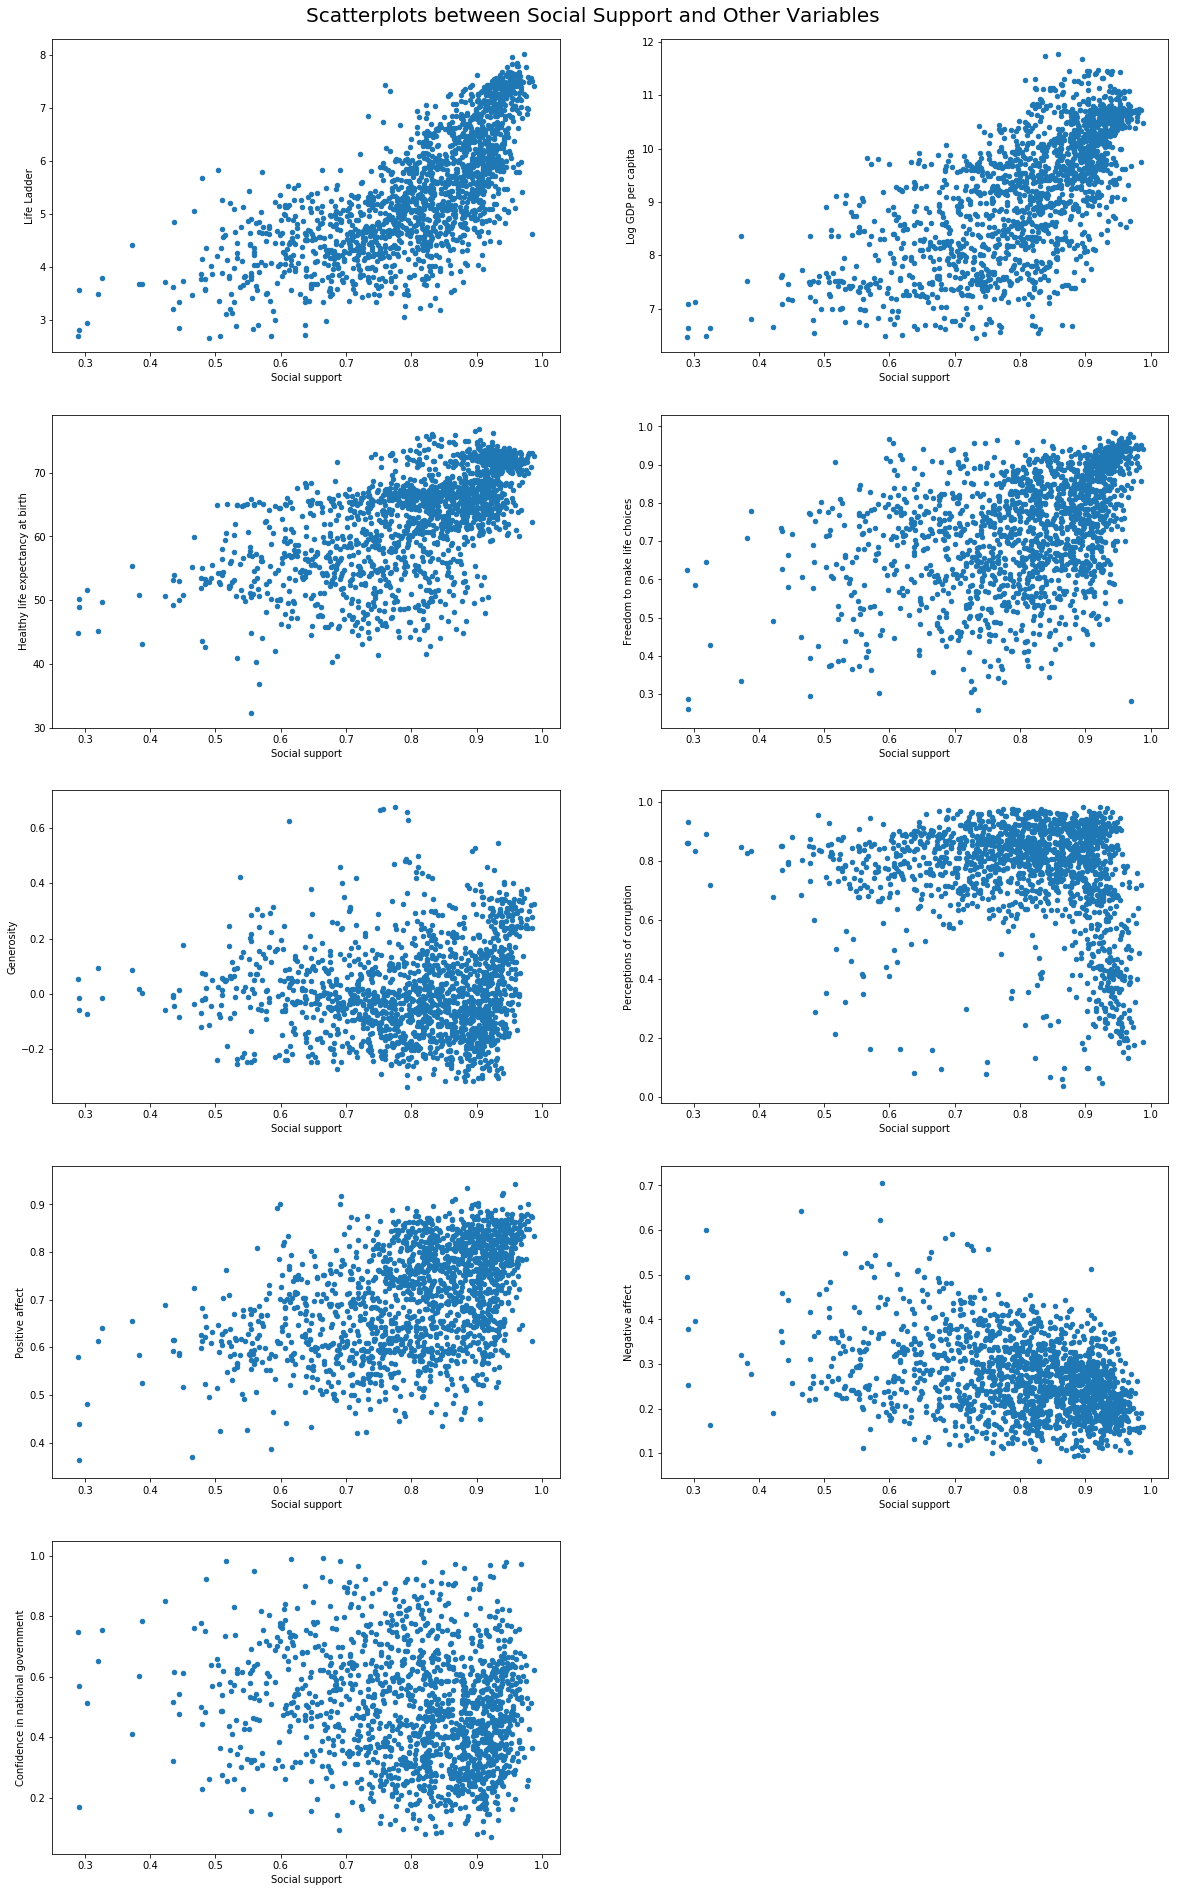

In [25]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))
fig.delaxes(axes[4][1])

happy_fin.plot(x="Social support",y="Life Ladder",kind="scatter",ax=axes[0,0])
happy_fin.plot(x="Social support",y="Log GDP per capita",kind="scatter",ax=axes[0,1])
happy_fin.plot(x="Social support",y="Healthy life expectancy at birth",kind="scatter",ax=axes[1,0])
happy_fin.plot(x="Social support",y="Freedom to make life choices",kind="scatter",ax=axes[1,1])
happy_fin.plot(x="Social support",y="Generosity",kind="scatter",ax=axes[2,0])
happy_fin.plot(x="Social support",y="Perceptions of corruption",kind="scatter",ax=axes[2,1])
happy_fin.plot(x="Social support",y="Positive affect",kind="scatter",ax=axes[3,0])
happy_fin.plot(x="Social support",y="Negative affect",kind="scatter",ax=axes[3,1])
happy_fin.plot(x="Social support",y="Confidence in national government",kind="scatter",ax=axes[4,0])
fig.suptitle('Scatterplots between Social Support and Other Variables',size=20)
fig.subplots_adjust(top=.965)
plt.show()

Social support seems to have relatively strong relationships with Life Ladder, Log GDP per capita, and Healthy life expectancy at birth. Social support seems to have relatively weak relationships with Generosity, Perceptions of corruption, and Confidence in national government.

##### <span style="color:darkblue">Summary Statistics and Distributions of Variables in 2017</span> #####

What are the typical values for each variable in 2017? Are the distributions skewed in any way?

In [28]:
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_clean.csv'
happy_2017 = pd.read_csv(url,index_col=0)
happy_2017=happy_2017.drop(['Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','gini of household income reported in Gallup, by wp5-year'], axis=1)
happy_2017.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
count,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2017.0,5.465390,9.275317,0.804770,64.242963,0.784174,-0.005966,0.724714,0.704822,0.291149,0.510319,-0.117409,-0.005404
std,0.0,1.146307,1.220444,0.122811,7.106393,0.126042,0.157051,0.182925,0.108317,0.089679,0.198559,0.881337,0.988643
min,2017.0,2.661718,6.494117,0.319589,45.200001,0.427011,-0.291227,0.161791,0.420962,0.148160,0.110937,-2.326562,-2.018497
25%,2017.0,4.608216,8.403157,0.729447,59.075001,0.715423,-0.134808,0.670283,0.615013,0.222534,0.363427,-0.687357,-0.678109
50%,2017.0,5.565829,9.486675,0.828646,66.049999,0.814200,-0.029977,0.779276,0.720716,0.279024,0.492874,-0.162903,-0.171764
75%,2017.0,6.240865,10.273013,0.905631,68.900002,0.884599,0.096426,0.850819,0.790781,0.345576,0.640114,0.639133,0.682359
max,2017.0,7.788252,11.454002,0.966753,76.500000,0.985178,0.629577,0.954393,0.902772,0.599335,0.981398,1.575009,2.069170


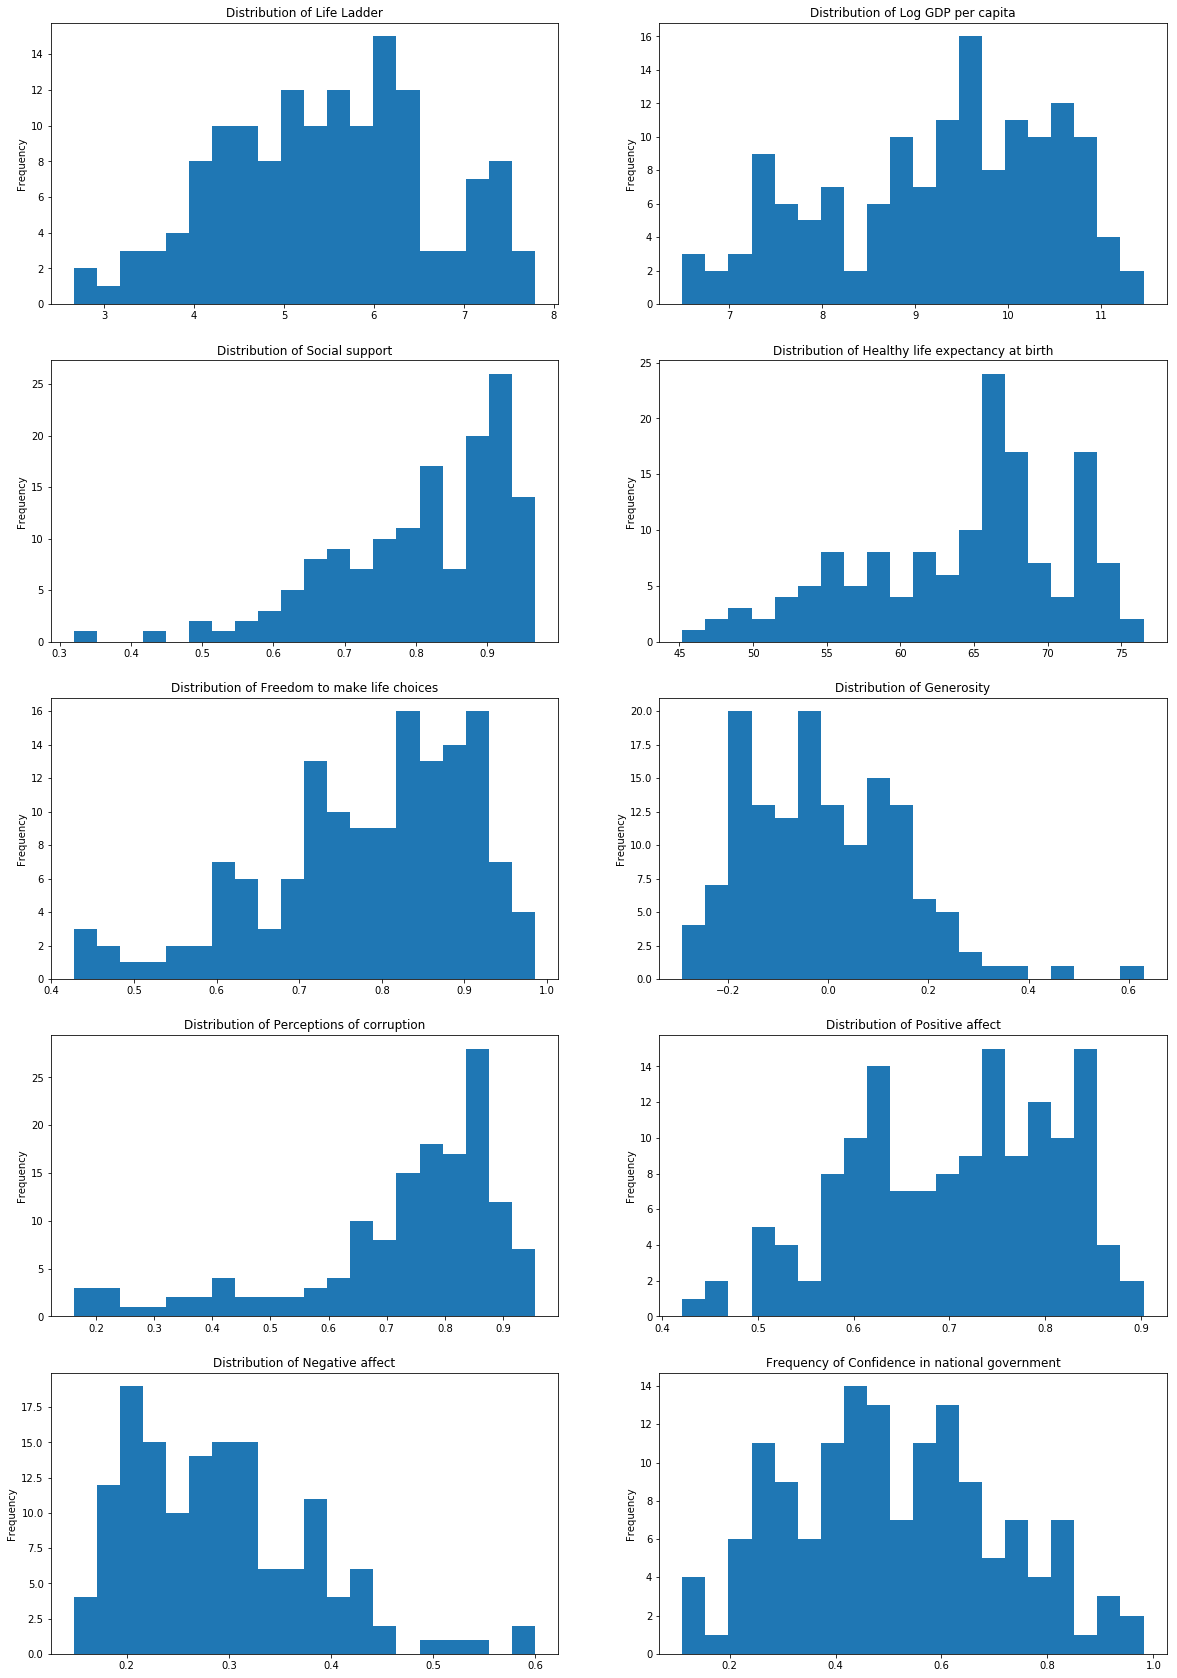

In [26]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))

happy_2017["Life Ladder"].plot(kind="hist",bins=20,ax=axes[0,0],title="Distribution of Life Ladder")
happy_2017["Log GDP per capita"].plot(kind="hist",bins=20,ax=axes[0,1],title="Distribution of Log GDP per capita")
happy_2017["Social support"].plot(kind="hist",bins=20,ax=axes[1,0],title="Distribution of Social support")
happy_2017["Healthy life expectancy at birth"].plot(kind="hist",bins=20,ax=axes[1,1],title="Distribution of Healthy life expectancy at birth")
happy_2017["Freedom to make life choices"].plot(kind="hist",bins=20,ax=axes[2,0],title="Distribution of Freedom to make life choices")
happy_2017["Generosity"].plot(kind="hist",bins=20,ax=axes[2,1],title="Distribution of Generosity")
happy_2017["Perceptions of corruption"].plot(kind="hist",bins=20,ax=axes[3,0],title="Distribution of Perceptions of corruption")
happy_2017["Positive affect"].plot(kind="hist",bins=20,ax=axes[3,1],title="Distribution of Positive affect")
happy_2017["Negative affect"].plot(kind="hist",bins=20,ax=axes[4,0],title="Distribution of Negative affect")
happy_2017["Confidence in national government"].plot(kind="hist",bins=20,ax=axes[4,1],title="Frequency of Confidence in national government")
plt.show()

Social support, is extremely left skewed, along with Healthy life expectancy at birth, Freedom to make life choices, and Perceptions of corruption. Generosity is extremely right skewed, along with Negative affect. The distribution of Life Ladder is relatively normal.

Although most countries have high scores for Social Support and Healthy life expectancy, the typical value for Life Ladder is 5.465390, leading us to believe that they can't be the only variables that affect happiness.

### <span style="color:darkblue">Unusual Features & Outliers</span> ###

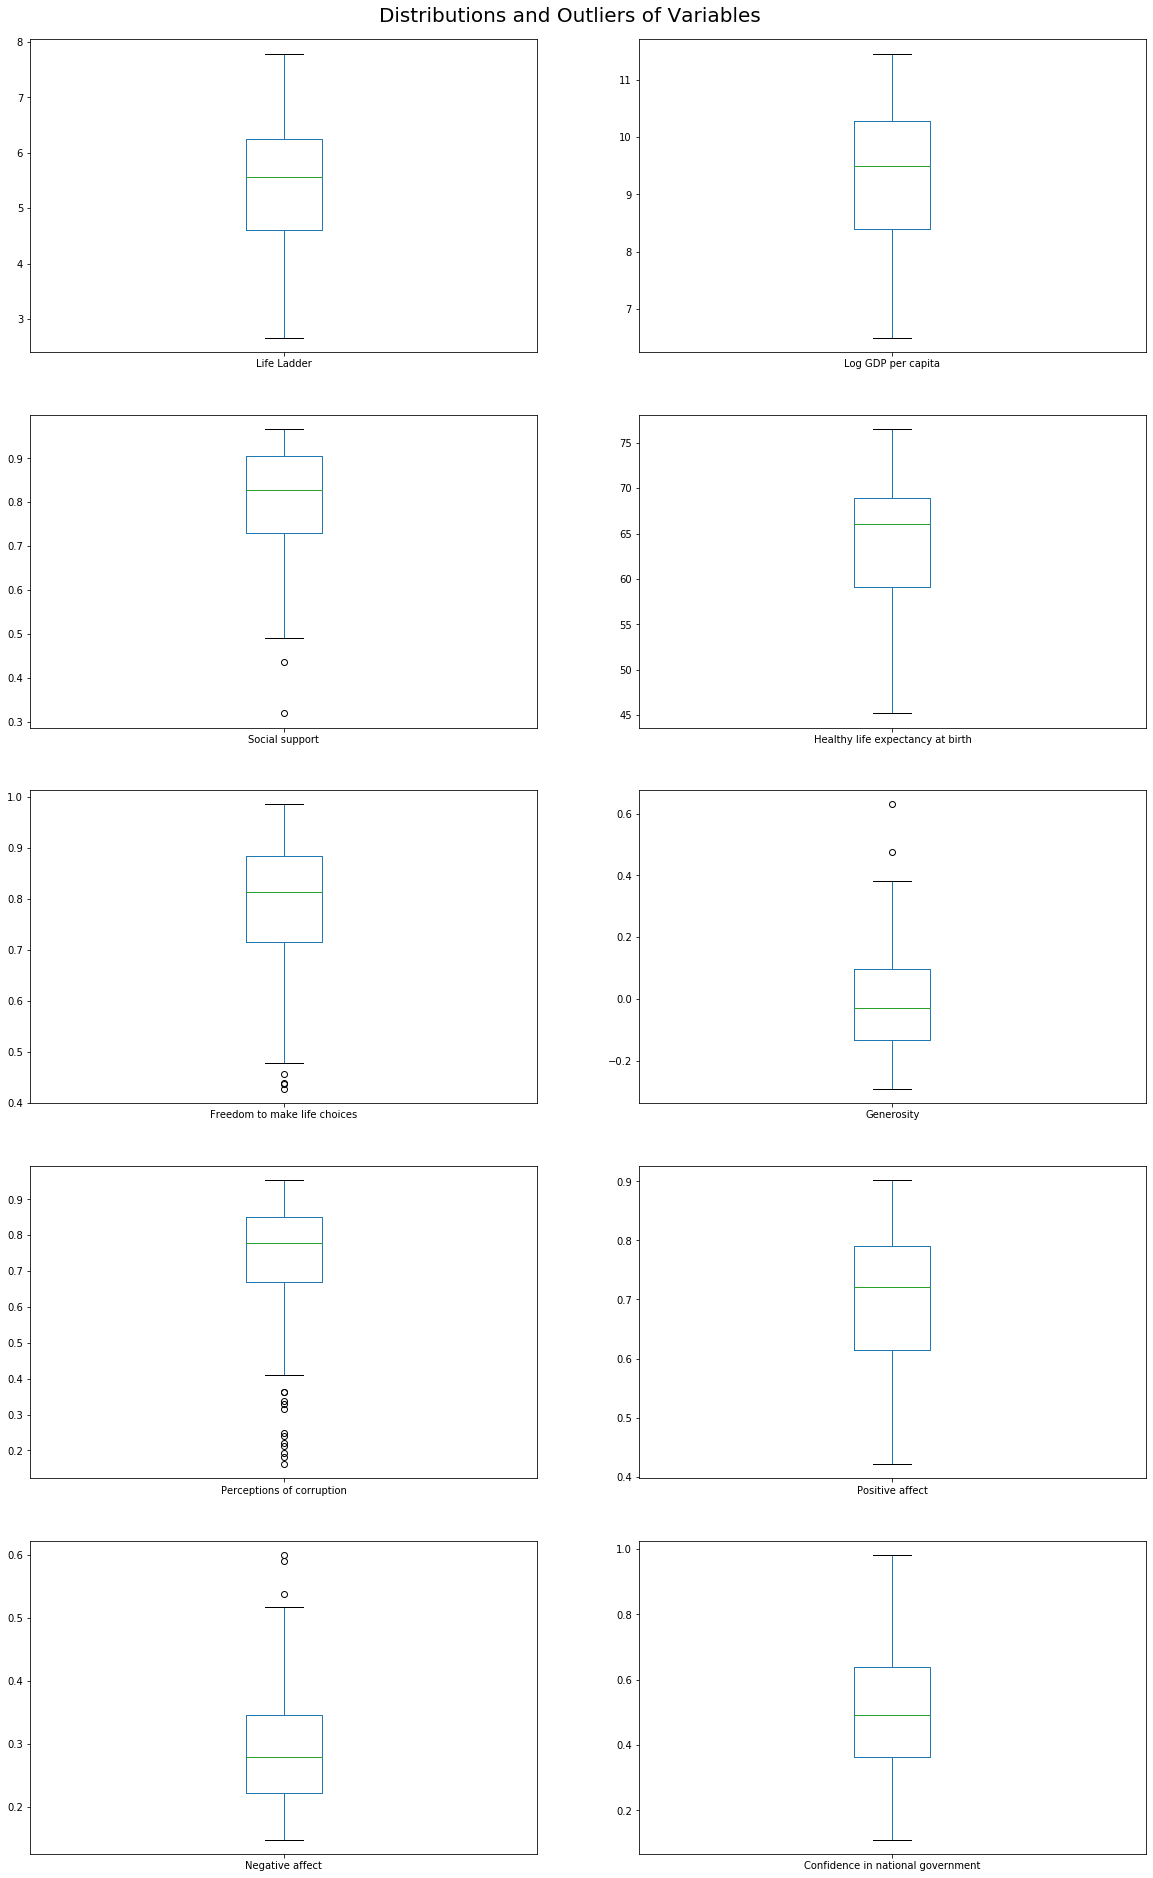

In [22]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,30))

happy_2017["Life Ladder"].plot(kind="box",ax=axes[0,0])
happy_2017["Log GDP per capita"].plot(kind="box",ax=axes[0,1])
happy_2017["Social support"].plot(kind="box",ax=axes[1,0])
happy_2017["Healthy life expectancy at birth"].plot(kind="box",ax=axes[1,1])
happy_2017["Freedom to make life choices"].plot(kind="box",ax=axes[2,0])
happy_2017["Generosity"].plot(kind="box",ax=axes[2,1])
happy_2017["Perceptions of corruption"].plot(kind="box",ax=axes[3,0])
happy_2017["Positive affect"].plot(kind="box",ax=axes[3,1])
happy_2017["Negative affect"].plot(kind="box",ax=axes[4,0])
happy_2017["Confidence in national government"].plot(kind="box",ax=axes[4,1])
fig.suptitle('Distributions and Outliers of Variables',size=20)
fig.subplots_adjust(top=.965)
plt.show()

__Social support__

In [23]:
IQR=happy_2017["Social support"].describe()[6]-happy_2017["Social support"].describe()[4]
happy_2017[happy_2017["Social support"]<happy_2017["Social support"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
152,Benin,2017,4.853181,7.632515,0.435879,53.900002,0.726808,-0.042811,0.767235,0.614722,0.457920,0.615089,0.211716,-0.571934
275,Central African Republic,2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733


- _The Central African Republic_ has many human rights issues, such as extrajudicial executions, torture, beatings, mob violence, female genital mutilation, human trafficking, and marriage of underage girls, which could contribute to its low social support score.


- _Benin_ faces many issues, such as low literacy rates, lack of clean water, crop failure, environmental destruction, along with corruption and poor governance, which could contribute to its low social support score.

__Freedom to make life choices__

In [24]:
IQR=happy_2017["Freedom to make life choices"].describe()[6]-happy_2017["Freedom to make life choices"].describe()[4]
happy_2017[happy_2017["Freedom to make life choices"]<happy_2017["Freedom to make life choices"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808
27,Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,0.324916,-0.927691,-0.816839
567,Greece,2017,5.148242,10.109460,0.752900,72.199997,0.438300,-0.291227,0.872239,0.602939,0.332831,0.139881,0.291475,0.124455
1398,South Sudan,2017,2.816622,7.313220,0.556823,51.000000,0.456011,0.053269,0.761270,0.585602,0.517364,0.461551,-2.138769,-2.018497


- _Afghanistan_ has a history of human rights abuses and violations committed by its security forces and intelligence agency, possibly explaining its low ranking.


- In _Algeria,_ elected officials have little say in government matters; rather, unelected civilian and military individuals rule the country and get to decide things like who is president.


- _Greece_'s long-term debt crisis and economic problems have likely made its population feel uncertain and helpless about its future.


- _South Sudan_ has been in an ongoing civil war since 2013; about 400000 people have been killed and 4 million people have been displace. This long-term crisis probably makes the population feel helpless and unable to make decisions.

__Generosity__

In [25]:
IQR=happy_2017["Generosity"].describe()[6]-happy_2017["Generosity"].describe()[4]
happy_2017[happy_2017["Generosity"]>happy_2017["Generosity"].describe()[6]+1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
665,Indonesia,2017,5.098402,9.322663,0.795589,61.900002,0.865026,0.475461,0.900416,0.862584,0.319172,0.825765,-0.190968,-0.166090
1046,Myanmar,2017,4.154342,8.629020,0.795184,58.700001,0.886012,0.629577,0.618822,0.745647,0.282286,0.824177,-0.974803,-0.848311


- _Myanmar_ is ranked highest in generosity, likely because 87.9% of the population practices Theravāda Buddhism. This religion encourages its followers to donate money to those living a monastery life, and small, frequent acts of giving are normal.


- _Indonesia_ is ranked second highest in generosity, probably because 87.2% of the population practice Islam. This religion also encourages its followers to donate money, a practice called infaq.

__Perceptions of corruption__

In [26]:
IQR=happy_2017["Perceptions of corruption"].describe()[6]-happy_2017["Perceptions of corruption"].describe()[4]
happy_2017[happy_2017["Perceptions of corruption"]<happy_2017["Perceptions of corruption"].describe()[4]-1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
269,Canada,2017,7.414868,10.692345,0.933749,73.400002,0.945145,0.155016,0.362034,0.862773,0.217981,0.652736,1.295284,1.866528
408,Denmark,2017,7.593702,10.751125,0.952100,72.099998,0.955416,0.152028,0.181148,0.823667,0.205775,0.572353,1.190443,1.868863
494,Finland,2017,7.788252,10.611172,0.963826,71.800003,0.962199,-0.005696,0.192413,0.787137,0.176066,0.597539,1.311007,1.999900
698,Ireland,2017,7.060155,11.117440,0.943482,72.199997,0.905341,0.210760,0.337085,0.833389,0.212784,0.603800,1.155644,1.463198
894,Luxembourg,2017,7.061381,11.454002,0.905436,72.599998,0.902822,0.039555,0.330174,0.765817,0.184467,0.738922,1.428659,1.774406
1075,Netherlands,2017,7.458965,10.788753,0.936501,72.199997,0.920320,0.244597,0.363134,0.852185,0.184520,0.669554,1.242933,1.899130
1087,New Zealand,2017,7.327183,10.493656,0.954921,73.000000,0.942279,0.289706,0.221887,0.817431,0.171717,0.609015,1.575009,2.004671
1138,Norway,2017,7.578745,11.079062,0.950128,73.099998,0.953017,0.218105,0.249711,0.849100,0.202914,0.717160,1.422639,2.013394
1279,Rwanda,2017,3.108374,7.525215,0.516550,60.500000,0.908115,0.050675,0.213757,0.762161,0.358310,0.981398,-0.541283,0.292253
1339,Singapore,2017,6.378438,11.356686,0.897350,76.500000,0.926128,0.125963,0.161791,0.800114,0.179325,0.926998,0.708122,2.069170


- _Canada_, _Denmark_, _Finland_, _Ireland_, _Luxembourg_, the _Netherlands_, _New Zealand_, _Norway_, _Sweden_, and _Switzerland_ all have socialist policies to some degree that benefit their populations. These countries also tend to be be quite happy, explaining their low perceptions of corruption.
- _Rwanda_ has strong and effective institutions, such as government, civil society, and media, that probably allow its population to believe it has low corruption.
- _Singapore_ has an agency called the Singapore Corrupt Practices Investigation Bureau that investigates and prosecutes corruption in the public and private sectors, which likely allows its population to believe that there is low corruption.

__Negative affect__

In [27]:
IQR=happy_2017["Negative affect"].describe()[6]-happy_2017["Negative affect"].describe()[4]
happy_2017[happy_2017["Negative affect"]>happy_2017["Negative affect"].describe()[6]+1.5*IQR]

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
275,Central African Republic,2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733
287,Chad,2017,4.558937,7.477691,0.660616,47.700001,0.614850,-0.004920,0.792390,0.627503,0.538245,0.473544,-1.356480,-1.349587
687,Iraq,2017,4.462399,9.659120,0.695109,59.599998,0.627722,-0.037715,0.757109,0.505289,0.590539,0.424051,-1.689634,-1.369387


- _Chad_ faces many issues, such as poverty, corruption, political violence, recurrent attempted coup d'état, and violent conflicts over land. Some social issues include the erosion of long-standing community culture and criminalization of same-sex sexual activities. All of these likely contribute to its high Negative affect score.
- _Iraq_ has one of the most corrupt governments and is one of the most politically unstable countries in the world, with a history of serious human rights issues, all of which probably affect its Negative affect score negatively.
- The _Central African Republic_ has many human rights issues, such as extrajudicial executions, torture, beatings, mob violence, female genital mutilation, human trafficking, and marriage of underage girls, which could contribute to its high Negative affect score.

### <span style="color:darkblue">Potential Relationships</span> ###

##### <span style="color:darkblue">Life Ladder and Social Support</span> #####

How does Life Ladder differ with high and low Social Support scores?

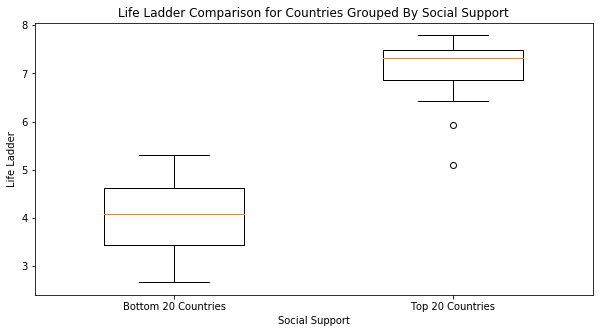

In [29]:
happy_2017_social=happy_2017.sort_values(by=["Social support"]) # sorted from least to most Social Support
social_bottom=happy_2017_social.iloc[:15,]
social_top=happy_2017_social.iloc[-15:,]
plt.figure(figsize=(10,5))
plt.boxplot([social_bottom["Life Ladder"],social_top["Life Ladder"]],widths=0.5)
plt.xticks([1,2],["Bottom 20 Countries","Top 20 Countries"])
plt.ylabel("Life Ladder")
plt.xlabel("Social Support")
plt.title("Life Ladder Comparison for Countries Grouped By Social Support")
plt.show()

In [30]:
social_bottom[["Life Ladder","Social support"]].describe()

,Life Ladder,Social support
count,15.000000,15.000000
mean,4.042647,0.555986
std,0.798326,0.090482
min,2.661718,0.319589
25%,3.446362,0.512178
50%,4.078620,0.582110
75%,4.627611,0.630179
max,5.312483,0.641193


In [31]:
social_top[["Life Ladder","Social support"]].describe()

,Life Ladder,Social support
count,15.000000,15.000000
mean,7.044293,0.946365
std,0.731402,0.010152
min,5.096902,0.933749
25%,6.867911,0.937414
50%,7.327183,0.943482
75%,7.474904,0.951114
max,7.788252,0.966753


Ranked by Social support, the bottom 20 countries have Social support scores ranging from 0.319589 to 0.641193 and Life Ladder scores ranging from 2.661718 to 5.312483. The top 20 countries have Social support scores ranging from 0.933749 to 0.966753 and Life Ladder scores ranging from 5.096902 to 7.788252.

Interestingly, both subsets have about the same range in Life Ladder scores (bottom 20 = 2.650765, top 20 = 2.69135), while their range of Social support scores differ greatly (bottom 20 = 0.321604, top 20 = 0.033004). This suggests that for countries with high scores of Social support, Social support has a weaker relationship with Life Ladder scores, while for countries with low scores of Social support, Social support has a stronger relationsihp with Life Ladder scores.

##### <span style="color:darkblue">Linear Model with Life Ladder</span> #####

In [76]:
stephen = pd.read_csv('https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv', index_col=0)
stephen.rename(columns={'Country name':'country_name','Life Ladder':'Ladder','Log GDP per capita':'log_gdp_per_cap','Social support':'Social_Support','Healthy life expectancy at birth':'life_exp','Freedom to make life choices':'freedom_make_life_choices','Perceptions of corruption':'perceived_corruption','Positive affect':'pos_aff','Negative affect':'neg_aff','Confidence in national government':'conf_in_gov','gini of household income reported in Gallup, by wp5-year':'gini_household_inc','Democratic Quality':'dem_qual'},inplace=True)

In [78]:
model = smf.ols('Ladder ~ log_gdp_per_cap + Social_Support + life_exp + freedom_make_life_choices + Generosity + perceived_corruption + pos_aff + neg_aff + conf_in_gov + dem_qual', data = stephen).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ladder   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     43.76
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           7.72e-37
Time:                        00:01:50   Log-Likelihood:                -111.69
No. Observations:                 141   AIC:                             245.4
Df Residuals:                     130   BIC:                             277.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The most significant indicators of life ladder score, according to the above model's coefficients and p-values, are Social Support, freedom to make life choices, and confidence in national government.

### <span style="color:darkblue">Exploratory analysis of the top and bottom ten countries according to different variables</span> ###

Now we will move on to looking at top ten and bottom ten countries for different variables.

In [79]:
stephen = stephen.set_index('country_name')

First we look at the top ten 'richest' countries according to gdp per capita.

The first graph shoes the countries life ladder scores.

The second graph shoes the 'richest' countries values for four differeny key variables identified through regression.

In [88]:
rich = stephen.sort_values(by=['log_gdp_per_cap'], ascending=False)
richest = rich.head(10)

poor = stephen.sort_values(by=['log_gdp_per_cap'], ascending=True)
poorest = poor.head(10)

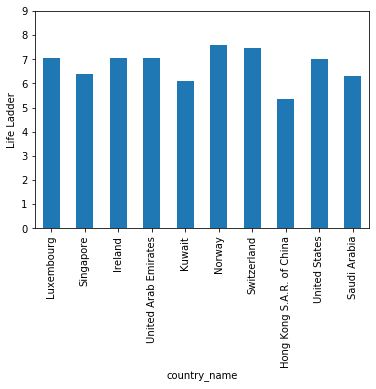

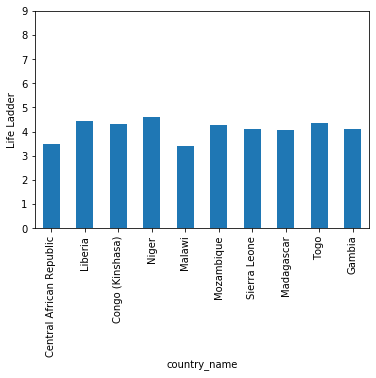

In [107]:
richest.Ladder.plot.bar()
plt.ylabel('Life Ladder')
plt.ylim(0,9)
plt.show()

poorest.Ladder.plot.bar()
plt.ylabel('Life Ladder')
plt.ylim(0,9)
plt.show()

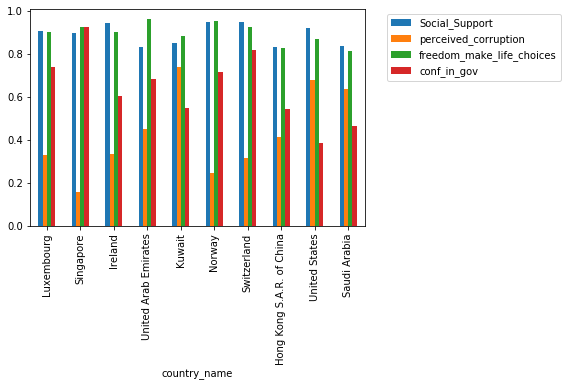

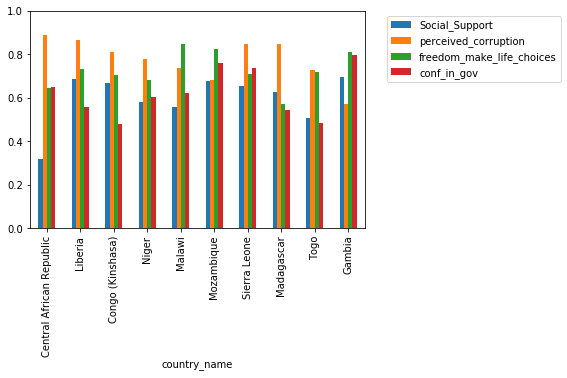

In [109]:
richest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.show()

poorest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.ylim(0,1)
plt.show()

The above side-by-side bar graph shows the top ten 'richest' countries according to gdp per capita. As you can see, all of then have relatively high Social Support and freedom to make life choices. The levels of perceived corruption and confidence in national government, however, are much more variable.

Now, we look at the top ten 'poorest' countries according to gdp per capita.

The first graph shows the countries life ladder scores.

The second graph shows the 'poorest' countries values for four differeny key variables identified through regression.

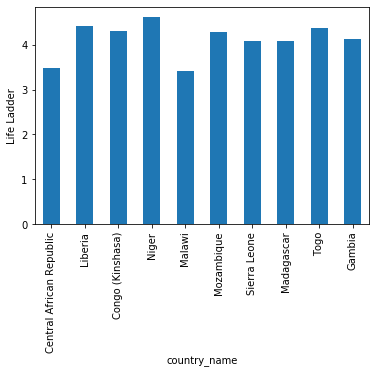

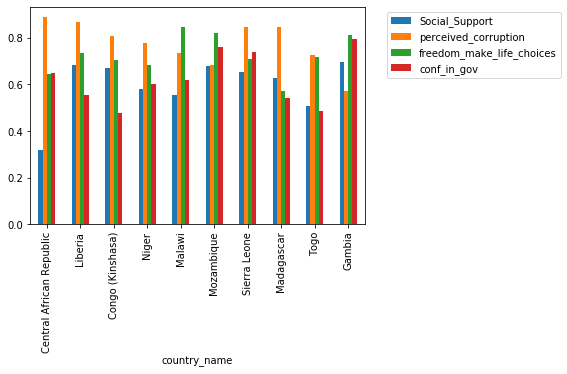

In [110]:
poor = stephen.sort_values(by=['log_gdp_per_cap'], ascending=True)
poorest = poor.head(10)
poorest.Ladder.plot.bar()
plt.ylabel('Life Ladder')
poorest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.show()

These countires have gernally high levels of perceived corruption and lower than average levels of social support and freedom to make life decisions. These countires are also among the saddest in terms of their life ladder scores. This could indicate that a certain level of economic stability/basic income is required in order to be happy (this is a gernal economic theory that has been discussed for year). This is similar to the idea that you must fulfill your basic needs before you can reach your highest happiness potential.

Now, we look at the top ten 'happiest' countries according to life ladder scores.

The first graph shows the countries life ladder scores. The second graph shows the 'happiest' countries values for four differeny key variables identified through regression.

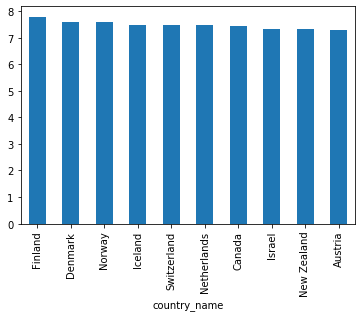

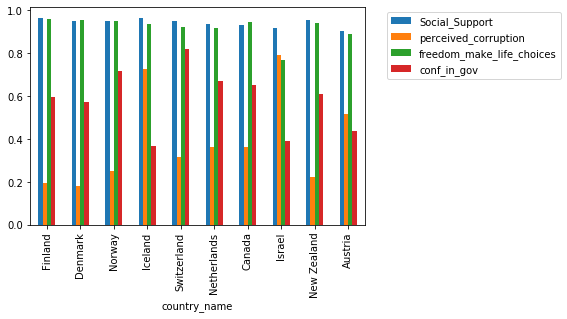

In [111]:
hap = stephen.sort_values(by=['Ladder'], ascending=False)
happiest = hap.head(10)
happiest.Ladder.plot.bar()
happiest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.legend(loc='upper right', bbox_to_anchor = (1.6,1))
plt.show()

The happiest countries all have very high social support and freedom to make life choices. This is unsurprising becasue those two variables were highly significant in the regression model.

The INTERESTING part of the second graph is that these countries have quite variable levels of perceived corruption and confidence in their national government. Confidence in national government was identified as a significant in determining life ladder score.

This leads to the conclusion that, even if a country has low confidence in their national government and high levels of perceived corruption (like Iceland and Isreal), high levels of social support and freedom to make life choices overpower the negative and produce high levels of happiness.

Now, we look at the top ten 'saddest' countries according to life ladder scores.

The first graph shows the countries life ladder scores.

The second graph shows the 'saddest' countries values for four differeny key variables identified through regression.

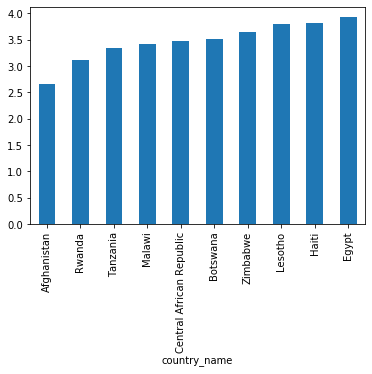

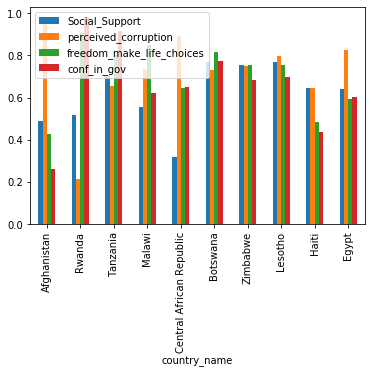

In [112]:
sad = stephen.sort_values(by=['Ladder'], ascending=True)
saddest = sad.head(10)
saddest.Ladder.plot.bar()
saddest[['Social_Support','perceived_corruption','freedom_make_life_choices','conf_in_gov']].plot.bar()
plt.show()

In contrast to the happiest countires, the saddest countries all hace lower than average levels of social support and freedom to make life choices. Since these two variables are SO significant in affecting life ladder, it makes sense that these ten countries are so sad.

### <span style="color:darkblue">Analysis of USA, South Korea, and Hong Kong over time</span> ###

Next, we focus on three countires (USA, South Korea, and Hong Kong) and study how their variables changes over time (2006-2018).

We study the change in different variables over time in the three countires we selected. Once these plots were created, we attempted to explain the trends in this data in accordance to political and economic events that match could potentially explain the trends.

*Note the political/economics events discussed are not proven to be the the cause of any of these treds. The commentary is merely a possible explanation for certain changes in the data in certain years.

In [3]:
happy_clean = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")

In [4]:
happy_clean=happy_clean.drop(['Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','gini of household income reported in Gallup, by wp5-year'], axis=1)
happy_clean.rename(columns={'Life Ladder':'Ladder','Country name':'name','Log GDP per capita':'log_gdp_per_cap','Social support':'Social_Support','Healthy life expectancy at birth':'life_exp','Freedom to make life choices':'freedom_make_life_choices','Perceptions of corruption':'perceived_corruption','Positive affect':'pos_aff','Negative affect':'neg_aff','Confidence in national government':'conf_in_gov','gini of household income reported in Gallup, by wp5-year':'gini_household_inc'},inplace=True)
happy_clean.head()
threec = happy_clean[(happy_clean.name == 'South Korea') | (happy_clean.name =='United States') | (happy_clean.name == 'Hong Kong S.A.R. of China')]
threec

,name,Year,Ladder,log_gdp_per_cap,Social_Support,life_exp,freedom_make_life_choices,Generosity,perceived_corruption,pos_aff,...,Delivery Quality,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
615,Hong Kong S.A.R. of China,2006,5.511187,10.680986,0.812178,74.284126,0.909820,0.145260,0.355985,0.723260,...,1.817265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,Hong Kong S.A.R. of China,2008,5.137262,10.750109,0.840222,74.284126,0.922211,0.285748,0.273945,0.718972,...,1.800208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,Hong Kong S.A.R. of China,2009,5.397056,10.723057,0.834716,74.644836,0.918026,0.297201,0.272125,0.762151,...,1.735793,NaN,NaN,0.302871,NaN,NaN,NaN,NaN,NaN,NaN
618,Hong Kong S.A.R. of China,2010,5.642835,10.781198,0.857314,74.827393,0.890418,0.321339,0.255775,0.710370,...,1.765605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,Hong Kong S.A.R. of China,2011,5.474011,10.821496,0.846060,75.227692,0.894330,0.223814,0.244887,0.733887,...,1.709979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,Hong Kong S.A.R. of China,2012,5.483765,10.827316,0.826426,75.280479,0.879752,0.211643,0.379783,0.715137,...,1.776015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,Hong Kong S.A.R. of China,2014,5.458051,10.874066,0.833558,75.731361,0.843082,0.212896,0.422960,0.683968,...,1.842695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,Hong Kong S.A.R. of China,2016,5.498421,10.904357,0.832078,75.953506,0.799743,0.089243,0.402813,0.664093,...,1.820220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,Hong Kong S.A.R. of China,2017,5.362475,10.934087,0.831066,75.907318,0.830657,0.128979,0.415810,0.639533,...,1.849664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,South Korea,2006,5.332178,10.192307,0.775499,70.199997,0.715242,-0.057112,0.798615,0.650549,...,0.753288,0.317,0.319000,NaN,0.380174,0.341741,0.302642,0.273333,0.282497,0.265923


First, we focus on how life ladder/happiness has changed over time.

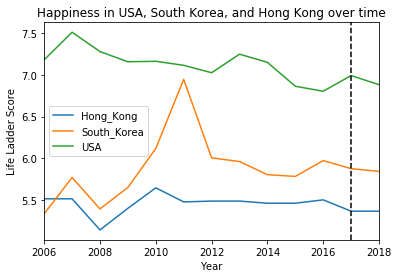

In [15]:
#interesting that happiness didnt dip in the USA during the financial crash of 2008, but it IS dipping now
overtime = threec.pivot_table(columns='name',index='Year',values='Ladder')
overtime.columns = ['Hong_Kong','South_Korea','USA']
overtime.Hong_Kong = overtime.Hong_Kong.ffill()
overtime
#HK had missing data in 2007, 2013, and 2018 so i used forwardfill
overtime.plot()
plt.ylabel('Life Ladder Score')
plt.xlabel('Year')
plt.title('Happiness in USA, South Korea, and Hong Kong over time')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

We suspect the large peak in the happiness value for South Korea is due to the economic boom they saw in 2010. Interestingly, although the US faced a huge economic recession in 2008, we do not see a similarly negative dip in happiness during that year. We wanted to study Hong Kong over time in order to view the trends in the data leading up to the current political crisis taking place with the protestors; Hong Kong has maintained a low level of happiness throughout the years.

Now we look at how social support changes over time.

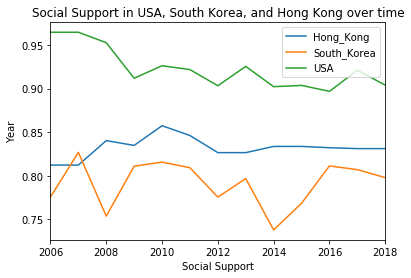

In [6]:
social_support = happy_clean[(happy_clean.name == 'South Korea') | (happy_clean.name =='United States')| (happy_clean.name == 'Hong Kong S.A.R. of China')]
social_support

soc = threec.pivot_table(columns='name',index='Year',values='Social_Support')
soc
soc.columns = ['Hong_Kong','South_Korea','USA']
soc

soc.Hong_Kong = soc.Hong_Kong.ffill()
soc.USA = soc.USA.ffill()
soc
soc.plot()
plt.ylabel('Year')
plt.xlabel('Social Support')
plt.title('Social Support in USA, South Korea, and Hong Kong over time')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

#article shows huge economic book in korea in 2011

Social support varies somewhat year to year, but not by much if you look at the range of the y axis. It seems that all three places have pretty decent social support across time, although, the US leads by a small margin. USA shows the highest overall social support, and the other two lag behind a little.

Now we look at how gdp per capita changes over time.

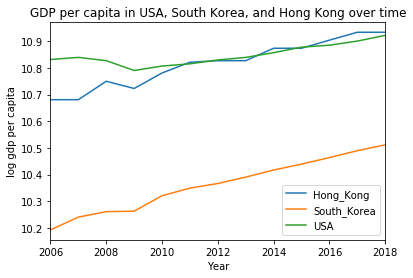

In [7]:
gdp = threec.pivot_table(columns='name',index='Year',values='log_gdp_per_cap')
gdp.columns = ['Hong_Kong','South_Korea','USA']
gdp.Hong_Kong = gdp.Hong_Kong.ffill()
gdp.plot()
plt.ylabel('log gdp per capita')
plt.xlabel('Year')
plt.title('GDP per capita in USA, South Korea, and Hong Kong over time')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

All three of the places we are studying had steady growth in GDP over the years. South Korea's GDP is a good deal lower than the other two.

Now we look at how negative affect changes over time.

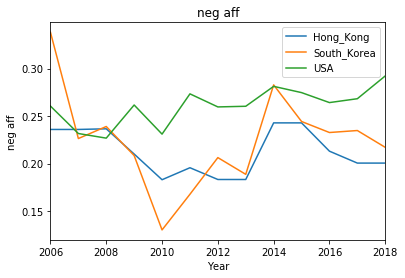

In [8]:
neg = threec.pivot_table(columns='name',index='Year',values='neg_aff')
neg.columns = ['Hong_Kong','South_Korea','USA']
neg.Hong_Kong = neg.Hong_Kong.ffill()
neg.plot()
plt.ylabel('neg aff')
plt.xlabel('Year')
plt.title('neg aff')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

USA: There are no huge peaks or valleys for the USA. We do see a general trend towards more negativity though, which could be a generational change.

South Korea: South Korea's economy collapsed in 1997. This financial crisis contiued until 2010 when the economy saw a significant rebound to pre-crisis levels with a 6.1% annual growth rate. This could explain why South Korean's had very negative attitudes (as seen in the graph) until 2010, when things began to turn around fiscally. Then, in 2014-2016, Korea experienced a significant political scandal with the declining satisfaction with and eventual impeachment of president Park Guen-hye due to corruption and abuse of power. The Sewol ferry sinkig accident in 2014 was the beginning of the end of Korean satisfaction with the president.

Hong Kong: We see more negative sentiments from around 2013-2016. This could be due to the pro-democracy rallies and referendums taking palce: the people were pushing for more democratic elections, which they were denied. This lack of satisfaction with the government could have lead to the peak in negative sentiment shows in that time period.

Now we look at how positive affect has changed over time.

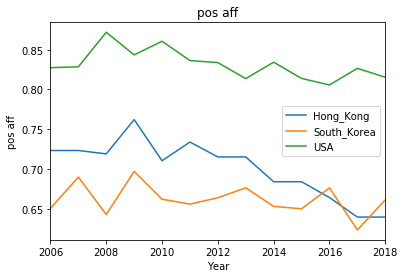

In [9]:
pos = threec.pivot_table(columns='name',index='Year',values='pos_aff')
pos.columns = ['Hong_Kong','South_Korea','USA']
pos.Hong_Kong = pos.Hong_Kong.ffill()
pos
pos.plot()
plt.ylabel('pos aff')
plt.xlabel('Year')
plt.title('pos aff')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

USA: We see positive affect steadily decliding.

South Korea: We see variation in positive affect but little overall change.

Hong Kong: We see positive affect steadily decliding since around 2012, probobly due to the protests and political scandals that continue to break out in Hong Kong, even to this day with the current protests. 2012 also happens to be when Leung Chun-ying became executive chief officer of Hong Kong; his administration faced many political controversies, which could have continued to decrease the positive affect in Hong Kong.

Generally, though, we see that the USA is a lot more positive than the other two: this could just be a cultural difference.

Now we look at how confidence in national government changes over time.

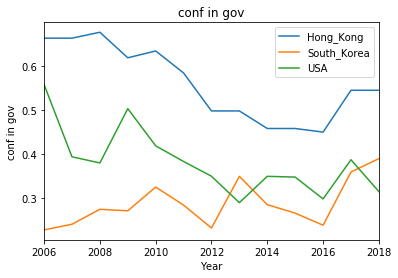

In [10]:
conf = threec.pivot_table(columns='name',index='Year',values='conf_in_gov')
conf.columns = ['Hong_Kong','South_Korea','USA']
conf.Hong_Kong = conf.Hong_Kong.ffill()
conf.plot()
plt.ylabel('conf in gov')
plt.xlabel('Year')
plt.title('conf in gov')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

USA: The 2008 financial crisis could explain the dip and then recovery of confidence in the government in the US during those years. Other than that, we see somewhat of a decrease in confidence in the US government over time.

South Korea: The confidence in government in South Korea remains low over time.

Hong Kong: Confidence in government steadily declines in Hong Kong, especially during Donald Tsang and Leung Chun-ying's administrations, which were both riddled with conflict. The number of scandals and lack of democracy in Hong Kong during this time could explain the decline in confidence in national government.

Now we look at how freedom to make life choices changes over time.

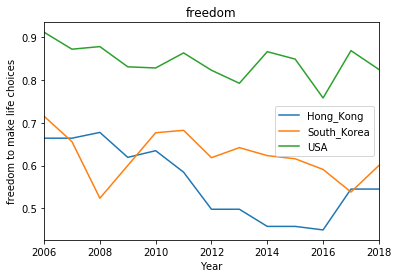

In [12]:
free = threec.pivot_table(columns='name',index='Year',values='freedom_make_life_choices')
free.columns = ['Hong_Kong','South_Korea','USA']
free.Hong_Kong = conf.Hong_Kong.ffill()
free.plot()
plt.ylabel('freedom to make life choices')
plt.xlabel('Year')
plt.title('freedom')
plt.axvline(x=2017, color='black', ls='--')
plt.show()

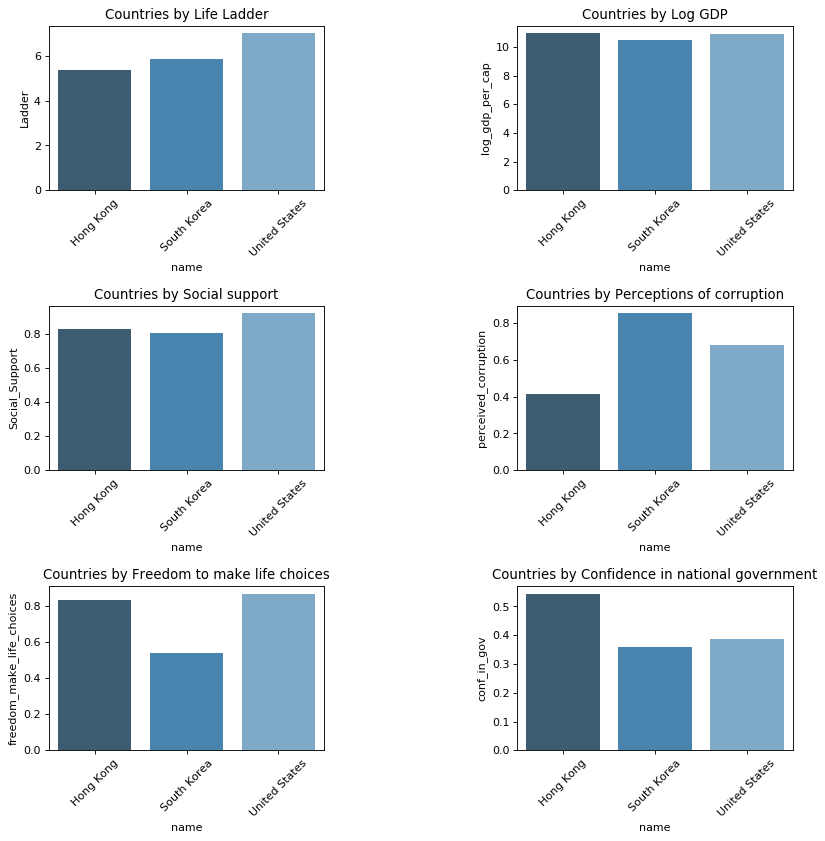

In [21]:
x = range(5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.7)

threec_2017 = threec.loc[threec.Year == 2017,]
threec_2017 = threec_2017.replace({'Hong Kong S.A.R. of China': 'Hong Kong'})


plt.subplot(3,2,1)
ax = sns.barplot(x="name", y='Ladder', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Life Ladder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,2)
ax = sns.barplot(x="name", y='log_gdp_per_cap', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Log GDP')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,3)
ax = sns.barplot(x="name", y='Social_Support', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Social support')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,4)
ax = sns.barplot(x="name", y='perceived_corruption', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Perceptions of corruption')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,5)
ax = sns.barplot(x="name", y='freedom_make_life_choices', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Freedom to make life choices')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,6)
ax = sns.barplot(x="name", y='conf_in_gov', data=threec_2017, palette="Blues_d")
ax.set_title('Countries by Confidence in national government')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

USA: People in the United States seem to feel generally free across the years.

South Korea: There is a dip in perceived freedom in South Korea in 2008.

Hong Kong: Starting 2008, the poeple of Hong Kong begin to feel less free. This could also be due to the vast corruption in the government during the time frame we are studying.

## Data Modeling ##

### <span style="color:darkblue">Linear Regression</span> ###



In this section, we will build a linear regression model using the 2017 data to see which factors are the most important in predicting the Life Ladder (happiness score) of the countries. Then, using this model, we will try predicting the Life Ladder for the 2018 data.

In [119]:
happy = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv")
happy_test = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")

In [120]:
happy = happy.drop(['Unnamed: 0','Region'], axis=1)
happy_test = happy_test[['Country name','Year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality']]
happy_test = happy_test.loc[happy_test.Year == 2018]

happy.set_index('Country name', inplace=True)
happy_test.set_index('Country name', inplace=True)

In [121]:
# This will be our training data
happy.head()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808
Albania,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945,-0.130315
Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,0.324916,-0.927691,-0.816839
Argentina,2017,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,0.351304,-0.158056
Armenia,2017,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,-0.633139,-0.132939


In [122]:
# This will be our testing data
happy_test.head()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,NaN,NaN
Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,NaN,NaN
Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,NaN,NaN
Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,NaN,NaN
Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,NaN,NaN


In [123]:
# We drop democratic quality and delivery quality because we realize there's too many missing values in happy_test
training = happy.drop(['Year','Democratic Quality','Delivery Quality'], axis=1)
testing = happy_test.drop(['Year','Democratic Quality','Delivery Quality'], axis=1).dropna()

X_train = training.loc[:, training.columns != 'Life Ladder']
y_train = training['Life Ladder']

X_test = testing.loc[:, testing.columns != 'Life Ladder']
y_test = testing['Life Ladder']

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis=1)
coefficients.columns = ['Variable','Coefficient']

print("The intercept is: ",model.intercept_)
print("------------------------------------------------------")
print(coefficients,"\n")

The intercept is:  -0.7944449974083616
------------------------------------------------------
                            Variable  Coefficient
0                 Log GDP per capita     0.227559
1                     Social support     2.409752
2   Healthy life expectancy at birth     0.020358
3       Freedom to make life choices     1.935546
4                         Generosity     0.560673
5          Perceptions of corruption    -1.106748
6                    Positive affect     1.189243
7                    Negative affect     0.289735
8  Confidence in national government    -1.417380 



It seems like the variables __Social support__, __Freedom to make life choices__, and __Confidence in national government__ are the most important predictors, according to the coefficient values here.

Below, we try using this linear regression model to make predictions on 2018 Life Ladder scores.

In [126]:
predictions = model.predict(X_test)
# Our R-squared
print("R-Squared: ",model.score(X_test, y_test))

# Our MSE
mse = mean_squared_error(y_test,predictions)
print("MSE: ",mse)

R-Squared:  0.7480340615957399
MSE:  0.3124207286591543


We see that the R-Squared is around 0.748, which is not great but not too terrible either. It seems like our model is doing decently well in predicting the values.

### <span style="color:darkblue">Top 20 Predicted vs. Actual</span> ###

One of the main questions we had with our data was, "Is there a cutoff on how much money/resources we need and being happy?". In other words, after a certain point of having abundant money/resources, is there no difference in how 'happy' you can be?

If yes, we would expect our predicted and actual top 20 happiest countries to be similar. If they are not, then it may suggest that there are other factors that haven't been considered yet that contributes to the Life Ladder score.

In [127]:
testing['predicted'] = predictions
testing.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,predicted
Country name,,,,,,,,,,,
Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,2.958427
Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,5.320175
Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,6.279743
Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,5.208364
Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,7.103927


In [138]:
# predicted Top 20 Countries
predicted_top = testing.sort_values(by='predicted',ascending=False)
predicted_top = predicted_top[0:20]

# actual Top 20 Countries
actual_top = testing.sort_values(by='Life Ladder',ascending=False)
actual_top = actual_top[0:20]

In [139]:
print("-------------------------")
print("Predicted Top 20 Countries:")
print(predicted_top[['predicted','Life Ladder']])
print("-------------------------")

-------------------------
Predicted Top 20 Countries:
                predicted  Life Ladder
Country name                          
Sweden           7.271445     7.374792
Norway           7.232952     7.444262
Denmark          7.228807     7.648786
New Zealand      7.201651     7.370286
Finland          7.124991     7.858107
Australia        7.103927     7.176993
Canada           7.026117     7.175497
United Kingdom   7.025341     7.233445
Netherlands      7.012608     7.463097
Ireland          6.972185     6.962336
Austria          6.800517     7.396002
Switzerland      6.760134     7.508587
United States    6.739866     6.882685
Germany          6.657227     7.118364
France           6.646376     6.665904
Slovenia         6.618894     6.249419
Luxembourg       6.614752     7.242631
Uruguay          6.576334     6.371715
Estonia          6.541931     6.091302
Panama           6.482970     6.281434
-------------------------


In [140]:
print("-------------------------")
print("Actual Top 20 Countries:")
print(actual_top[['predicted','Life Ladder']])
print("-------------------------")

-------------------------
Actual Top 20 Countries:
                predicted  Life Ladder
Country name                          
Finland          7.124991     7.858107
Denmark          7.228807     7.648786
Switzerland      6.760134     7.508587
Netherlands      7.012608     7.463097
Norway           7.232952     7.444262
Austria          6.800517     7.396002
Sweden           7.271445     7.374792
New Zealand      7.201651     7.370286
Luxembourg       6.614752     7.242631
United Kingdom   7.025341     7.233445
Australia        7.103927     7.176993
Canada           7.026117     7.175497
Costa Rica       6.316867     7.141075
Germany          6.657227     7.118364
Czech Republic   5.972781     7.034165
Ireland          6.972185     6.962336
Israel           6.113789     6.927179
Belgium          6.473677     6.892172
United States    6.739866     6.882685
France           6.646376     6.665904
-------------------------


In [141]:
print("-------------------------")
print("Difference between the two:")
print(pd.concat([predicted_top, actual_top]).drop_duplicates(keep=False)['Life Ladder'])
print("-------------------------")

-------------------------
Difference between the two:
Country name
Slovenia          6.249419
Uruguay           6.371715
Estonia           6.091302
Panama            6.281434
Costa Rica        7.141075
Czech Republic    7.034165
Israel            6.927179
Belgium           6.892172
Name: Life Ladder, dtype: float64
-------------------------


In predicted but not in actual: Slovenia, Uruguay, Estonia, Panama

In actual but not in predicted: Costa Rica, Czech Republic, Israel, Belgium

It seems like we were off by 4 countries in our predicted top 20 countries (which is 20% of the data). Since we correctly identified the 16 of the top 20 countries, it seems like the factors we considered are important in Life Ladder (happiness) score. This suggests that after reaching a certain point of development/abundant resources, you can only go up so much.

### <span style="color:darkblue">Bottom 20 Predicted vs. Actual</span> ###

In [142]:
# predicted Bottom 20 Countries
predicted_bottom = testing.sort_values(by='predicted',ascending=True)
predicted_bottom = predicted_bottom[:20]

# actual Bottom 20 Countries
actual_bottom = testing.sort_values(by='Life Ladder',ascending=True)
actual_bottom = actual_bottom[:20]

In [143]:
print("-------------------------")
print("Predicted Bottom 20 Countries:")
print(predicted_bottom[['predicted','Life Ladder']])
print("-------------------------")

-------------------------
Predicted Bottom 20 Countries:
                     predicted  Life Ladder
Country name                               
Afghanistan           2.958427     2.694303
Sierra Leone          3.641283     4.305683
Chad                  3.695582     4.486325
Benin                 3.835141     5.819827
Malawi                3.970320     3.334634
Ethiopia              4.087241     4.379262
Togo                  4.095003     4.022895
Liberia               4.096325     4.134853
Madagascar            4.128245     4.070587
Niger                 4.167079     5.164007
Haiti                 4.184104     3.614928
Burkina Faso          4.222075     4.927236
Ivory Coast           4.230760     5.268375
Cameroon              4.332124     5.250738
Comoros               4.338805     3.972820
Guinea                4.352669     5.252227
Senegal               4.365528     4.769377
Mozambique            4.387344     4.653714
Congo (Brazzaville)   4.430756     5.490214
Tanzania           

In [178]:
print("-------------------------")
print("Actual Bottom 20 Countries:")
print(actual_bottom[['predicted','Life Ladder']])
print("-------------------------")

-------------------------
Actual Bottom 20 Countries:
              predicted  Life Ladder
Country name                        
Afghanistan    2.958427     2.694303
Malawi         3.970320     3.334634
Tanzania       4.446662     3.445023
Botswana       4.993553     3.461366
Rwanda         4.928172     3.561047
Haiti          4.184104     3.614928
Zimbabwe       4.570696     3.616480
India          4.666098     3.818069
Comoros        4.338805     3.972820
Togo           4.095003     4.022895
Zambia         4.663282     4.041488
Madagascar     4.128245     4.070587
Liberia        4.096325     4.134853
Iran           4.858020     4.278118
Sierra Leone   3.641283     4.305683
Mauritania     4.729100     4.313615
Uganda         4.545430     4.321715
Ethiopia       4.087241     4.379262
Sri Lanka      5.716812     4.400223
Myanmar        5.314763     4.410633
-------------------------


In [179]:
print("-------------------------")
print("Difference between the two:")
print(pd.concat([predicted_bottom, actual_bottom]).drop_duplicates(keep=False)['Life Ladder'])
print("-------------------------")

-------------------------
Difference between the two:
Country name
Chad                   4.486325
Benin                  5.819827
Niger                  5.164007
Burkina Faso           4.927236
Ivory Coast            5.268375
Cameroon               5.250738
Guinea                 5.252227
Senegal                4.769377
Mozambique             4.653714
Congo (Brazzaville)    5.490214
Botswana               3.461366
Rwanda                 3.561047
Zimbabwe               3.616480
India                  3.818069
Zambia                 4.041488
Iran                   4.278118
Mauritania             4.313615
Uganda                 4.321715
Sri Lanka              4.400223
Myanmar                4.410633
Name: Life Ladder, dtype: float64
-------------------------


We see that unlike top 20 countries, we have a lot more misclassification of bottom 20 countries ranked by their Life Ladder score. This suggests that at the bottom...?

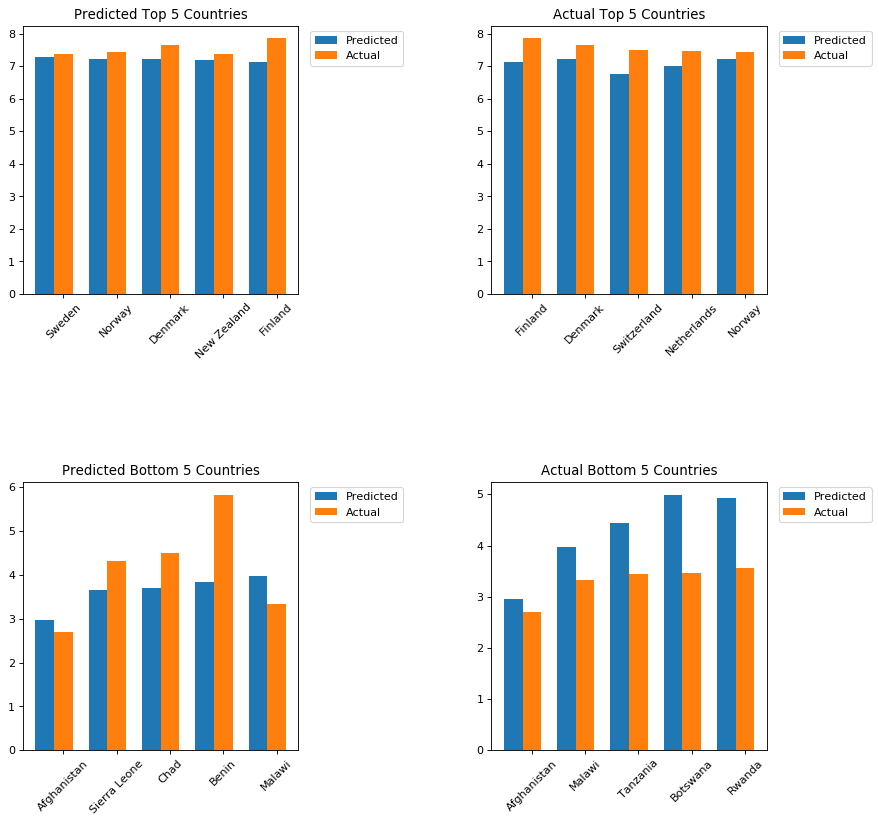

In [180]:
predicted_topp = predicted_top['predicted']
predicted_topa = predicted_top['Life Ladder']

actual_topp = actual_top['predicted']
actual_topa = actual_top['Life Ladder']

predicted_bottomp = predicted_bottom['predicted']
predicted_bottoma = predicted_bottom['Life Ladder']

actual_bottomp = actual_bottom['predicted']
actual_bottoma = actual_bottom['Life Ladder']

figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.7)

N = 5
ind = np.arange(N) 
width = 0.35  

plt.subplot(2,2,1)
plt.bar(ind, predicted_topp[0:5], width=width, label='Predicted')
plt.bar(ind+width, predicted_topa[0:5], width=width, label='Actual')
plt.title("Predicted Top 5 Countries")
plt.xticks([r + width for r in range(len(ind))],predicted_topp.index.values[0:5], rotation=45)
plt.legend(loc='upper right', bbox_to_anchor = (1.4,1))

plt.subplot(2,2,2)
plt.bar(ind, actual_topp[0:5], width=width, label='Predicted')
plt.bar(ind+width, actual_topa[0:5], width=width, label='Actual')
plt.title("Actual Top 5 Countries")
plt.xticks([r + width for r in range(len(ind))],actual_topp.index.values[0:5], rotation=45)
plt.legend(loc='upper right', bbox_to_anchor = (1.4,1))

plt.subplot(2,2,3)
plt.bar(ind, predicted_bottomp[0:5], width=width, label='Predicted')
plt.bar(ind+width, predicted_bottoma[0:5], width=width, label='Actual')
plt.title("Predicted Bottom 5 Countries")
plt.xticks([r + width for r in range(len(ind))],predicted_bottomp.index.values[0:5], rotation=45)
plt.legend(loc='upper right', bbox_to_anchor = (1.4,1))

plt.subplot(2,2,4)
plt.bar(ind, actual_bottomp[0:5], width=width, label='Predicted')
plt.bar(ind+width, actual_bottoma[0:5], width=width, label='Actual')
plt.title("Actual Bottom 5 Countries")
plt.xticks([r + width for r in range(len(ind))],actual_bottomp.index.values[0:5], rotation=45)
plt.legend(loc='upper right', bbox_to_anchor = (1.4,1))
plt.show()

## For Fun: Our Survey ##

In [32]:
our_survey = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Stats%20131%20Final%20Project%20Happiness%20Poll2.csv'
survey = pd.read_csv(our_survey)
survey.columns =  ['Timestamp','Username','Life Ladder','Social support','Freedom to make life choices','Generosity','Perceptions of corruption','Perceptions of corruption (business)','Happiness','Smile','Enjoyment','Worry','Sadness','Anger']
survey = survey.replace('Yes',1)
survey = survey.replace('No',0)
survey = survey.replace('Satisfied',1)
survey = survey.replace('Dissatisfied',0)

survey_mean = np.mean(survey)
survey_mean["Positive affect"]=np.mean([survey_mean.Happiness,survey_mean.Smile,survey_mean.Enjoyment])
survey_mean["Negative affect"]=np.mean([survey_mean.Worry,survey_mean.Sadness,survey_mean.Anger])
survey_mean=survey_mean[["Life Ladder","Social support","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"]]

In [33]:
US_2017=happy_2017[happy_2017["Country name"]=="United States"]
US_2017_survey=US_2017.reset_index()[["Life Ladder","Social support","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"]]

In [34]:
personal_and_US=pd.DataFrame(data={"Data":["Personal Data","US 2017 Data"],
                                   "Social support":[1,0.921003],"Freedom to make life choices":[0.750000,0.868497],
                                  "Generosity":[0.250000,0.188833],"Perceptions of corruption":[1,0.681191],
                                  "Positive affect":[0.916667,0.826555],"Negative affect":[0.083333,0.268269]})
melted=pd.melt(personal_and_US,id_vars = "Data")

In [37]:
survey_mean["Life Ladder"]

6.5

In [38]:
print(US_2017_survey["Life Ladder"])

0    6.991759
Name: Life Ladder, dtype: float64


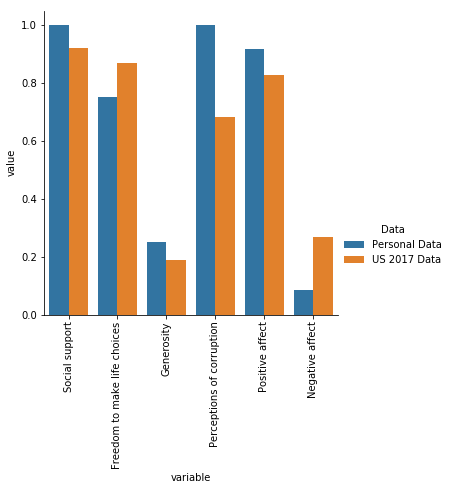

In [35]:
sns.catplot(x="variable",y="value",hue="Data",data=melted,kind='bar').set_xticklabels(rotation=90)
plt.show()

__Comparison__
- _Life Ladder_: Our score is lower. It was pulled down by Stephen, who gave a 5 because he was sick the day that he took the survey.
- _Social support_: Our score is higher than the US 2017 data. As college students, we are constantly surrounded by other students like us, so we have a higher chance of having someone to rely on than the average US adult. 
- _Freedom to make life choices_: Our score is lower. Since we've been students for the majority of our lives, we're more limited in what we think we can do than the average US adult not in college.  
- _Generosity_: Our score is higher. Of the 4 of us, Rebecca indicated that she had donated money to charity in the past month, making our average 0.25.  
- _Perceptions of corruption_: Our score is higher. As college students, we're more critical and cynical of the corruption we think is going on around us.  
- _Positive affect_: Our score is higher. Since we're surrounded by our friends at school, we have more opportunities to experience positive feelings than the average US adult who doesn't get to see their friends as much.
- _Negative affect_: Our score is lower. As college students, we probably have less things to stress about than the average US adult, and therefore experience negative feelings less.